# Melbourne House Prices Project

## Account authorization section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls
import os
os.chdir("/content/drive/My Drive/Workspace")
!ls

drive  sample_data
melb_data.csv  MelbourneML.ipynb


## Import library

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Data Exploration

In [ ]:
mp_file_path= 'melb_data.csv'
mp_data= pd.read_csv(mp_file_path)
mp_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
mp_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
mp_data = mp_data.dropna(axis=0)

In [ ]:
y= mp_data.Price
mp_features= ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X= mp_data[mp_features]
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


## Creating Model

In [55]:
def decTree(max_leaf_nodes,train_X, train_y, val_X, val_y):
  model = DecisionTreeRegressor(max_leaf_nodes= max_leaf_nodes, random_state=0)
  model.fit(train_X, train_y)
  preds_val = model.predict(val_X)
  mae = mean_absolute_error(val_y, preds_val)
  return mae

def randmForest(train_X, train_y, val_X, val_y):
  forest_mp= RandomForestRegressor(random_state=1)
  forest_mp.fit(train_X, train_y)
  forest_prediction= forest_mp.predict(val_X)
  forest_mae= mean_absolute_error(val_y, forest_prediction)
  return forest_mae

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
print(round(decTree(500,train_X,train_y,val_X,val_y)))
print(round(randmForest(train_X, train_y, val_X, val_y)))

261718.0
207191.0


<function matplotlib.pyplot.show>

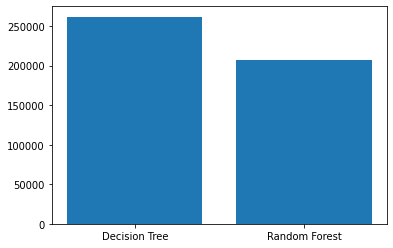

In [58]:
decVal= round(decTree(500,train_X,train_y,val_X,val_y))
randomFor= round(randmForest(train_X, train_y, val_X, val_y))
label= ['Decision Tree', 'Random Forest']
values=[decVal,randomFor]
plt.bar(label,values)
plt.show